In [32]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
    
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
from tabGAN import TabGAN
from src import constants as const
import helpers
from v2_hp_tuning import fetch_hp_info

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"

%run "$imports_path"

In [34]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [35]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

METHOD_NAME = "tabGAN-qtr"
hp_info = fetch_hp_info(method=METHOD_NAME)

In [36]:
def plot_hp_tuning(hp_name, allow_not_complete_hp_vec=True, n_synthetic_datasets=None, **kwargs):
    curr_image_dir = os.path.join(const.dir.images_hp_v2(), METHOD_NAME)
    curr_hp_info = hp_info[hp_name]
    if n_synthetic_datasets is None:
        n_synthetic_datasets = curr_hp_info["n_synthetic_datasets"]
    result = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
        data_train=data_train, 
        data_test=data_test,
        dataset_dir=const.dir.hp_tuning_v2(),
        hyperparams_vec=curr_hp_info["vec"],
        hyperparams_name = hp_name,
        hyperparams_subname = curr_hp_info["hyperparams_subname"],
        subfolder=METHOD_NAME,
        n_synthetic_datasets = n_synthetic_datasets,
        save_dir = const.dir.images_hp_v2(),
        save_path = f"predictive_performance_against_{hp_name}.svg",
        incl_comparison_folder=True,
        allow_not_complete_hp_vec=allow_not_complete_hp_vec,
        **kwargs
    )
    return result

  0%|          | 0/190 [00:00<?, ?it/s]

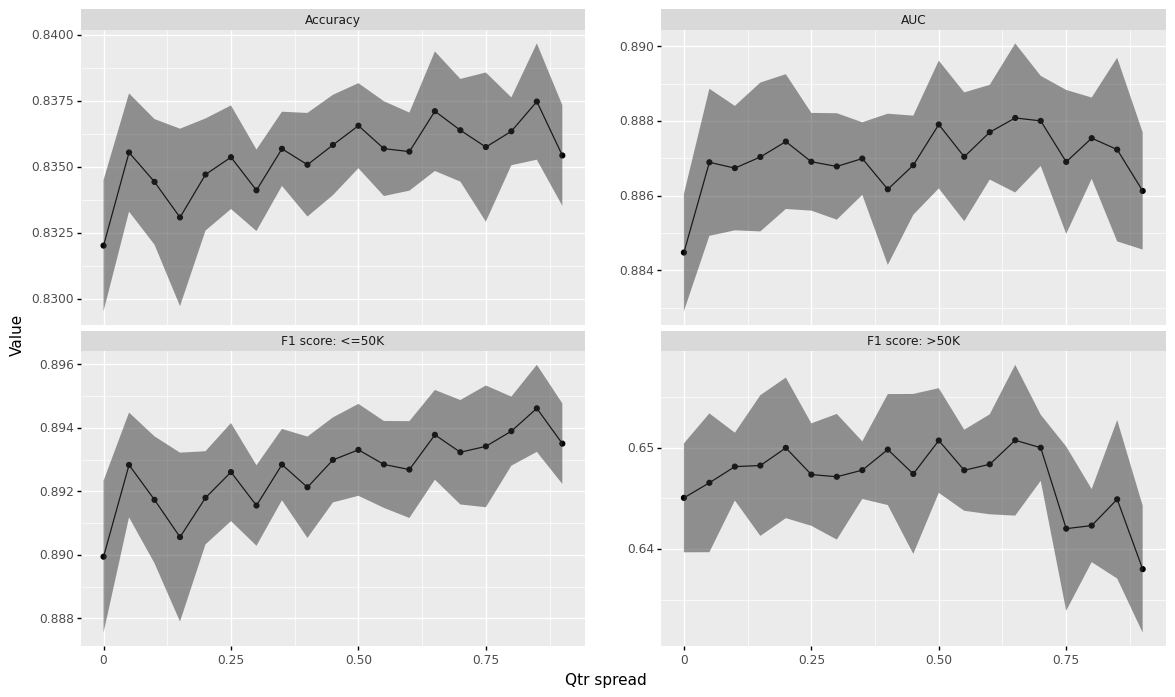

In [37]:
result_qtr_spread = plot_hp_tuning("qtr_spread")

In [38]:
result_qtr_spread

,Qtr spread,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.832012,0.884475,0.767497,0.889941,0.645053,0.002489,0.001573,0.002332,0.002393,0.005382
1,0.05,0.835544,0.886894,0.769687,0.892832,0.646542,0.002243,0.001972,0.003716,0.001651,0.006859
2,0.10,0.834429,0.886738,0.769937,0.891733,0.648141,0.002383,0.001668,0.001988,0.002000,0.003350
3,0.15,0.833081,0.887037,0.769403,0.890559,0.648247,0.003366,0.001996,0.003992,0.002662,0.006956
4,0.20,0.834708,0.887449,0.770895,0.891797,0.649993,0.002127,0.001807,0.003814,0.001468,0.006946
5,0.25,0.835365,0.886909,0.769981,0.892607,0.647354,0.001965,0.001310,0.002748,0.001545,0.005062
6,0.30,0.834110,0.886783,0.769346,0.891554,0.647138,0.001546,0.001427,0.003091,0.001268,0.006210
7,0.35,0.835684,0.886995,0.770317,0.892843,0.647790,0.001407,0.000973,0.001614,0.001124,0.002846
8,0.40,0.835080,0.886171,0.770977,0.892129,0.649826,0.001966,0.002027,0.002847,0.001597,0.005484
9,0.45,0.835830,0.886816,0.770205,0.892991,0.647419,0.001904,0.001329,0.004108,0.001339,0.007904


  0%|          | 0/190 [00:00<?, ?it/s]

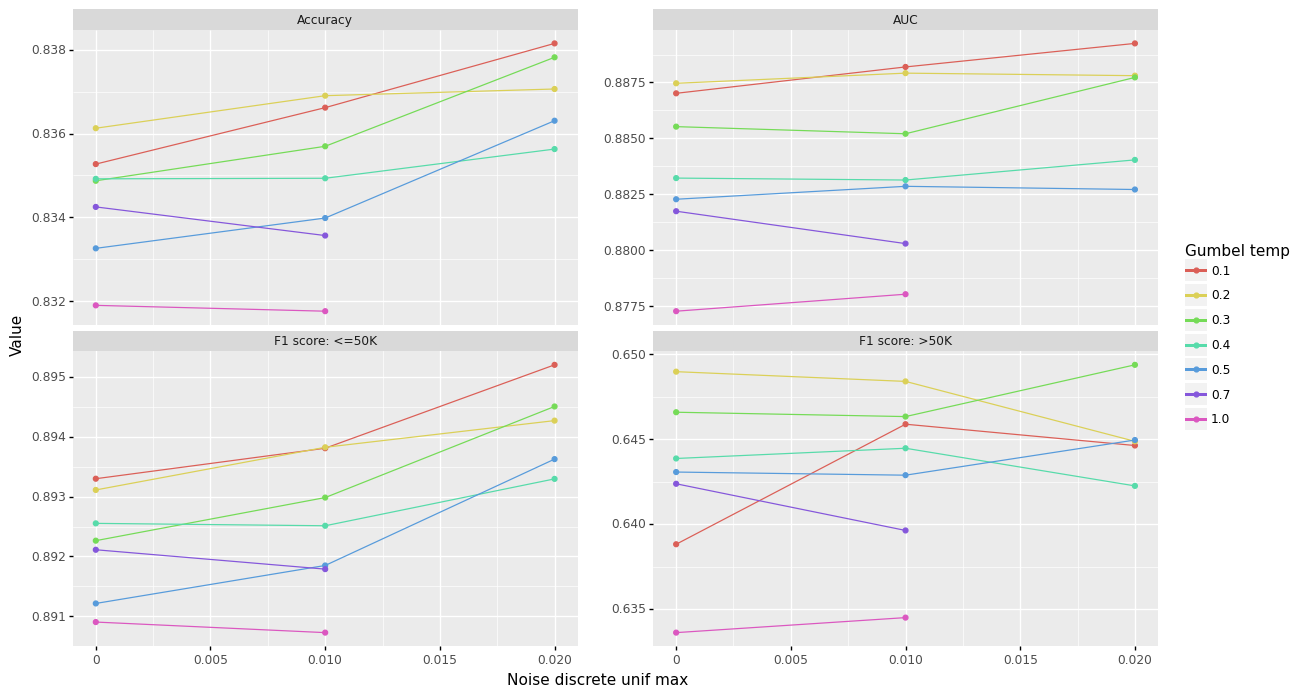

In [42]:
result_oh_encoding_choices = plot_hp_tuning("oh_encoding_choices")

In [43]:
result_oh_encoding_choices

,Noise discrete unif max,Gumbel temp,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.1,0.835272,0.887017,0.766056,0.893300,0.638812,0.002350,0.001989,0.002297,0.001831,0.003564
1,0.00,0.2,0.836129,0.887465,0.771046,0.893112,0.648980,0.002015,0.001778,0.002569,0.001462,0.004147
2,0.00,0.3,0.834874,0.885529,0.769427,0.892263,0.646590,0.002450,0.002103,0.003393,0.001745,0.005653
3,0.00,0.4,0.834920,0.883232,0.768209,0.892553,0.643866,0.002435,0.001543,0.003451,0.001739,0.005842
4,0.00,0.5,0.833260,0.882287,0.767139,0.891213,0.643066,0.001606,0.002765,0.002762,0.001303,0.005442
5,0.00,0.7,0.834250,0.881753,0.767243,0.892111,0.642375,0.001857,0.001814,0.003674,0.001454,0.007269
6,0.00,1.0,0.831899,0.877289,0.762253,0.890901,0.633605,0.002381,0.001964,0.005752,0.001678,0.011246
7,0.01,0.1,0.836620,0.888195,0.769847,0.893810,0.645885,0.002026,0.001602,0.002614,0.001493,0.004378
8,0.01,0.2,0.836906,0.887918,0.771116,0.893825,0.648406,0.001967,0.001345,0.002454,0.001407,0.003819
9,0.01,0.3,0.835697,0.885211,0.769659,0.892984,0.646334,0.001165,0.001392,0.002409,0.000972,0.004911


  0%|          | 0/30 [00:00<?, ?it/s]

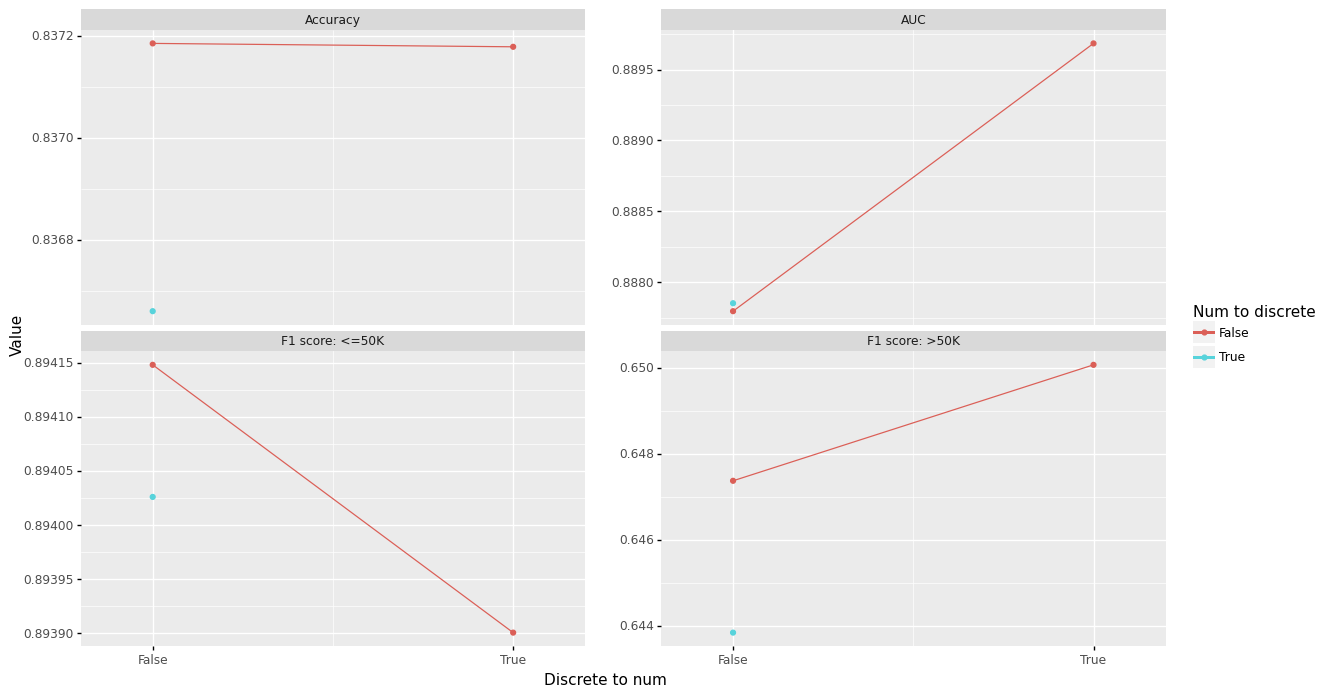

In [39]:
result_add_connection = plot_hp_tuning("add_connection")

In [26]:
result_add_connection

,Discrete to num,Num to discrete,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0,False,0.837185,0.887795,0.770757,0.894148,0.647366,0.002268,0.001188,0.003717,0.001629,0.006721


  0%|          | 0/20 [00:00<?, ?it/s]

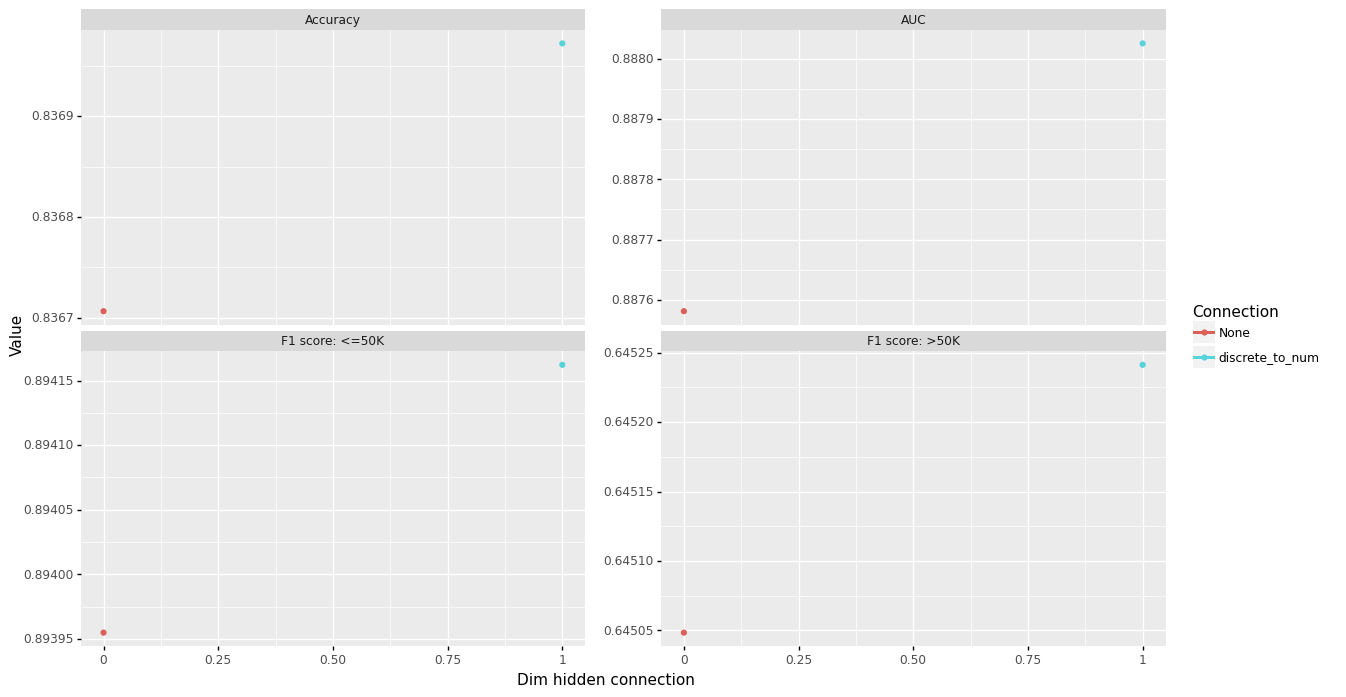

In [40]:
result_add_connection_advanced = plot_hp_tuning("add_connection_advanced")

In [41]:
result_add_connection_advanced

,Dim hidden connection,Connection,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0,None,0.836707,0.887581,0.769502,0.893955,0.645048,0.002352,0.001816,0.003809,0.001620,0.006686
1,1,discrete_to_num,0.836972,0.888025,0.769702,0.894162,0.645241,0.002010,0.001644,0.003347,0.001404,0.005995
